In [31]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [32]:
# Step 1: Load the dataset
# Open the .zip file and read a specific CSV file inside it
with zipfile.ZipFile('creditcard.csv.zip') as z:
    with z.open('creditcard.csv') as f:
        df = pd.read_csv(f)

In [33]:
# Step 2: Basic EDA and Data Preprocessing
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

In [34]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [35]:
# Check class distribution
print("\nClass distribution:")
print(df['Class'].value_counts())


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [36]:
# Step 3: Reduce dataset size for faster training
# Sample 10% of the dataset
print("\nSampling 10% of the dataset for faster training...")
df_sampled = df.sample(frac=0.1, random_state=42)



Sampling 10% of the dataset for faster training...


In [37]:
# Step 4: Feature Selection and Splitting Data
X = df_sampled.drop("Class", axis=1)
y = df_sampled["Class"]


In [38]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTraining and testing split done.")


Training and testing split done.


In [39]:
# Step 5: Train the Random Forest model
print("\nTraining the Random Forest model...")
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)
print("Model training completed.")



Training the Random Forest model...
Model training completed.


In [40]:
# Step 6: Evaluate the model
print("\nEvaluating the model...")
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


Evaluating the model...


In [41]:
# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[5688    0]
 [   0    9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5688
           1       1.00      1.00      1.00         9

    accuracy                           1.00      5697
   macro avg       1.00      1.00      1.00      5697
weighted avg       1.00      1.00      1.00      5697



In [42]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 1.0000


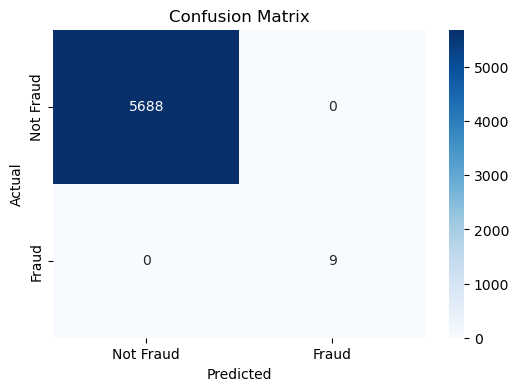

In [43]:
# Step 7: Visualize the results
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [44]:
# Step 8: Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

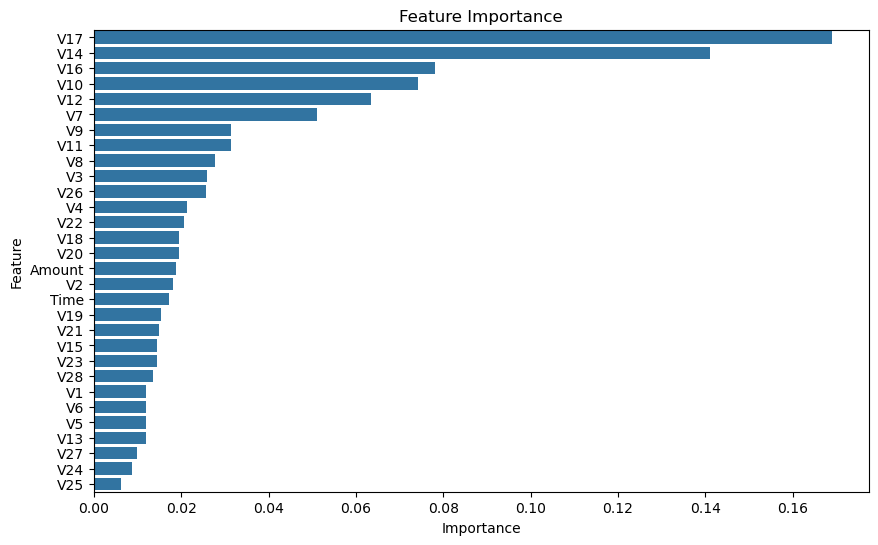

In [45]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()